# Bandpass filtering noise
#### by Elizabeth Barnes

This example shows how bandpass filtering noise can make your data look periodic - so be careful!

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack as fftpack

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

### Get your data together

Make-up some white noise data.

In [11]:
x = np.random.normal(size=(1000,))

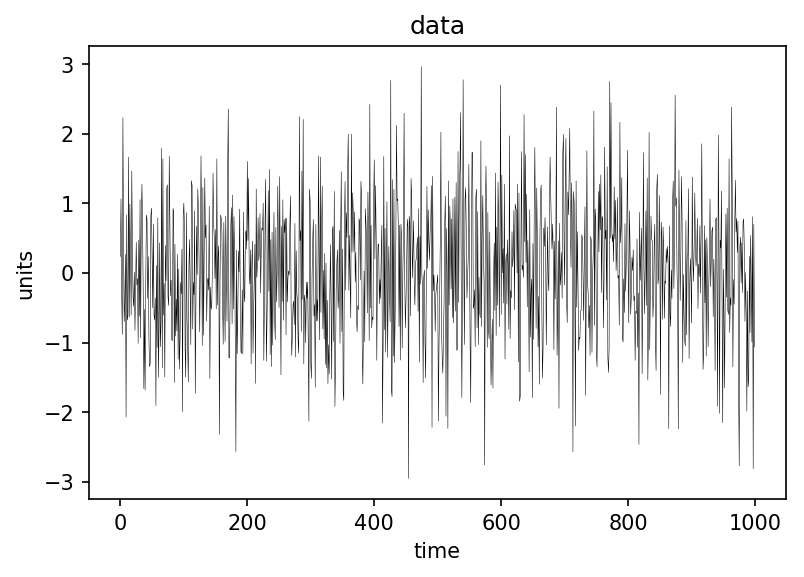

In [12]:
#%% plot full time series
plt.figure()
plt.plot(np.arange(0,np.size(x)),x,'-k', linewidth = .25)
plt.ylabel('units')
plt.xlabel('time')
plt.title('data')
plt.show()

### Calculate the FFT of the data

In [13]:
#%% calculate the FFT of the data (can also use np.fft.rfft(x))
Z = np.fft.fft(x)

# to get the right variance, need to normalize by the length of the time
# series, however, don't want to to do this if inputting back into "ifft"
Yfft = Z/np.size(x)

### Plot the spectrum

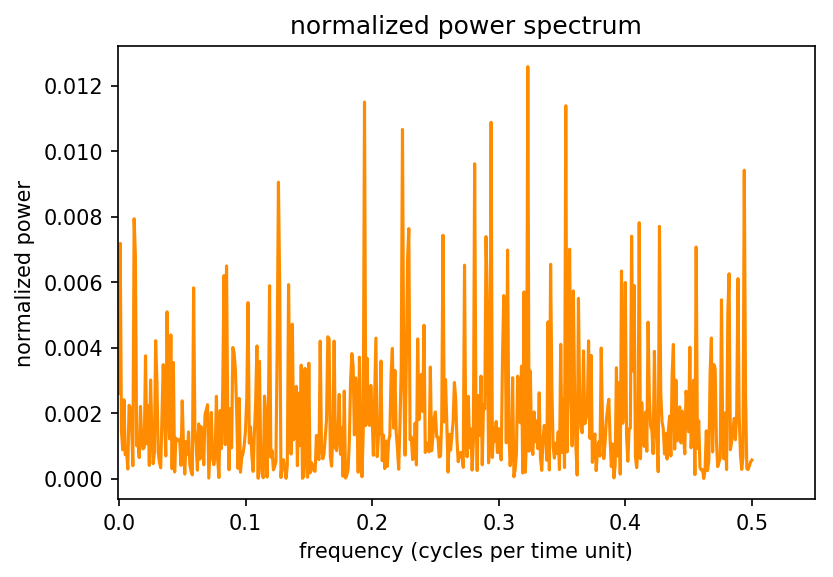

In [14]:
# get frequencies
freq = np.fft.rfftfreq(len(x))

# the factor of 2 in front is needed or the sum won't equal the total variance of X
Ck2 = 2.*np.abs(Yfft[0:int(np.size(x)/2)+1])**2 

plt.figure()
plt.plot(freq,Ck2/np.sum(Ck2),'-', color = 'darkorange', label = 'original spectrum')
plt.ylabel('normalized power')
plt.xlabel('frequency (cycles per time unit)')
plt.xlim(-.001,.55)
plt.title('normalized power spectrum')
plt.show()

In [15]:
# checking that the variance compared to the total variance in our spectrum
# (Parseval's Theorem)

# actual variance of our data
var_actual = np.var(x)

# variance in our spectrum, it should be close to the actual variance of our data
a = Yfft[np.arange(0,int(np.size(x)/2)+1)]
s=np.sum(a[1::]*np.conj(a[1::])) # don't want to include the mean, since this is not in the variance calculation
var_spectrum = np.real(2*s) # multiply by two in order to conserve variance

print('variance actual = ' + str(var_actual) )
print('variance spect. = ' + str(var_spectrum) )

#another way to calculate it using np.fft.rfft
#b = np.fft.rfft(x)/np.size(x)
#print(np.real(2*np.sum(b[1::]*np.conj(b[1::]))))

variance actual = 0.9688321743757445
variance spect. = 0.9691101015976281


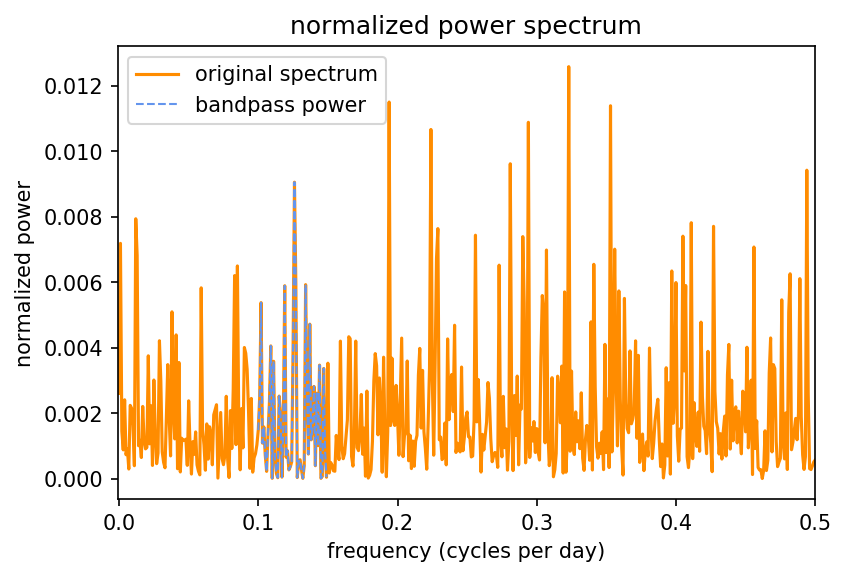

In [16]:
# plot spectrum and show that we will only retain the power within a band of frequencies

plt.figure()
plt.plot(freq,Ck2/np.sum(Ck2),'-', color = 'darkorange', label = 'original spectrum')
plt.ylabel('normalized power')
plt.xlabel('frequency (cycles per day)')
plt.xlim(-.001,.5)
plt.title('normalized power spectrum')

A = Ck2/np.sum(Ck2)
A[:100] = 0.
A[171:] = 0.
plt.plot(freq[100:150],A[100:150],'--', color = 'cornflowerblue' ,linewidth = 1, label = 'bandpass power')

plt.legend()
plt.show()

### Retain power over a range of frequencies (bandpass)

In [17]:
# low pass filter the data;
# i.e. retain only the mean and the first two harmonics - set all other frequencies to zero
Zlow = np.copy(Z)
Zlow[:100] = 0.0
Zlow[171:] = 0.0

# convert back to time space
X_filtered = np.real(np.fft.ifft(Zlow))

### Plot the resulting filtered time series in time space

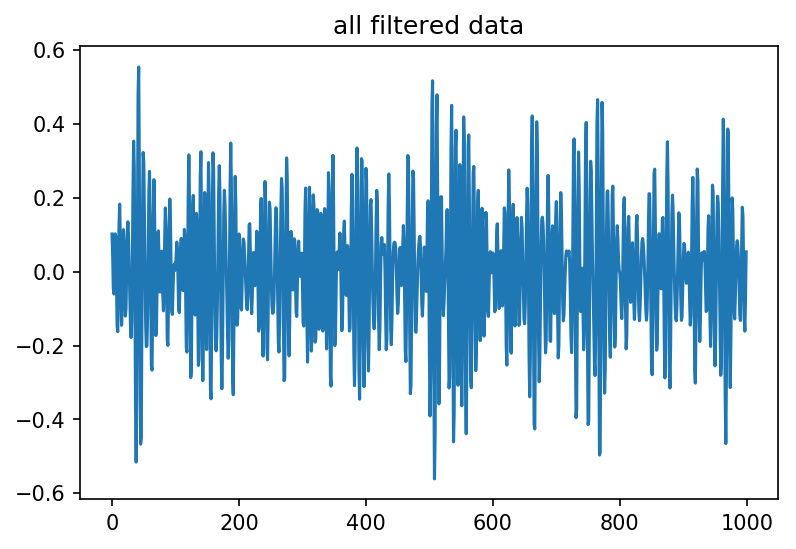

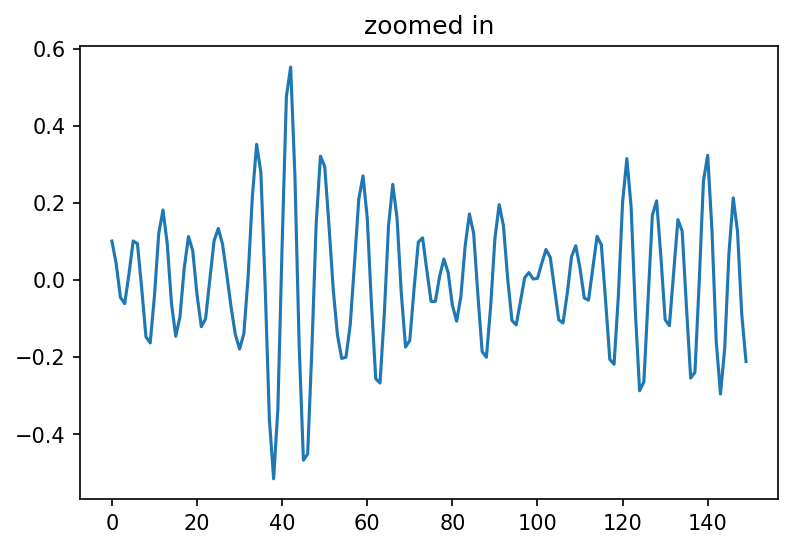

In [18]:
plt.figure()
plt.plot(X_filtered,'-')
plt.title('all filtered data')
plt.show()

plt.figure()
plt.plot(X_filtered[:150],'-')
plt.title('zoomed in')
plt.show()


Note how periodic the data looks - even though it was originally white! So beware, any data that you bandpass filter will start to look periodic because you filtered it!

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/bandpassfiltering_noise.ipynb*